1. Importar librerias necesarias

In [9]:
import json
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


Importamos librerías para:

Manipular datos (numpy, json)

Visualizar resultados (matplotlib)

Crear y evaluar el modelo (scikit-learn)

2. Cargar y procesar datos

In [10]:
with open('datos/stations.json', 'r') as file:
    data = json.load(file)

features = []
target = []

for station in data['features']:
    props = station['properties']
    try:
        bikes_available = props['bikesAvailable']
        docks_available = props['docksAvailable']
        total_docks = props['totalDocks']
        latitude = props['latitude']
        longitude = props['longitude']

        if None not in (bikes_available, docks_available, total_docks, latitude, longitude):
            features.append([docks_available, total_docks, latitude, longitude])
            target.append(bikes_available)
    except KeyError:
        continue


Cargamos el archivo stations.json y extraemos las características:

docks disponibles

total de docks

latitud

longitud
El objetivo (target) es el número de bicicletas disponibles.

3. Normalizar y dividir los datos

In [11]:
X = np.array(features)
y = np.array(target).reshape(-1, 1)

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


Se normalizan tanto las entradas (X) como las salidas (y) usando StandardScaler.
Luego se dividen en conjuntos de entrenamiento y prueba.

4. Crear y entrenar modelo

In [12]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

Creamos una instancia de regresión lineal y la entrenamos con los datos normalizados.

5. Evaluar el modelo

In [13]:
y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Resultados Regresión Multivariable ---")
print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Coeficiente de determinación (R2): {r2:.4f}")



--- Resultados Regresión Multivariable ---
Error cuadrático medio (MSE): 0.0418
Coeficiente de determinación (R2): 0.9656


Calculamos y mostramos el error cuadrático medio (MSE) y el coeficiente de determinación (R2).

6. Mostrar ejemplos de prediccion

In [14]:
y_test_real = scaler_y.inverse_transform(y_test)
y_pred_real = scaler_y.inverse_transform(y_pred)

print("\nEjemplos de predicción:")
for i in range(10):
    print(f"Real: {y_test_real[i][0]:.2f} - Predicción: {y_pred_real[i][0]:.2f}")



Ejemplos de predicción:
Real: 14.00 - Predicción: 13.45
Real: 5.00 - Predicción: 3.96
Real: 2.00 - Predicción: 4.98
Real: 2.00 - Predicción: 5.27
Real: 33.00 - Predicción: 32.42
Real: 1.00 - Predicción: 0.41
Real: 3.00 - Predicción: 2.28
Real: 5.00 - Predicción: 4.24
Real: 9.00 - Predicción: 8.76
Real: 9.00 - Predicción: 7.99


Se invierte la normalización para ver valores reales vs. predichos en su escala original.

7. Graficar resultados

7.1 Grafico de comparacion: valores reales vs predichos

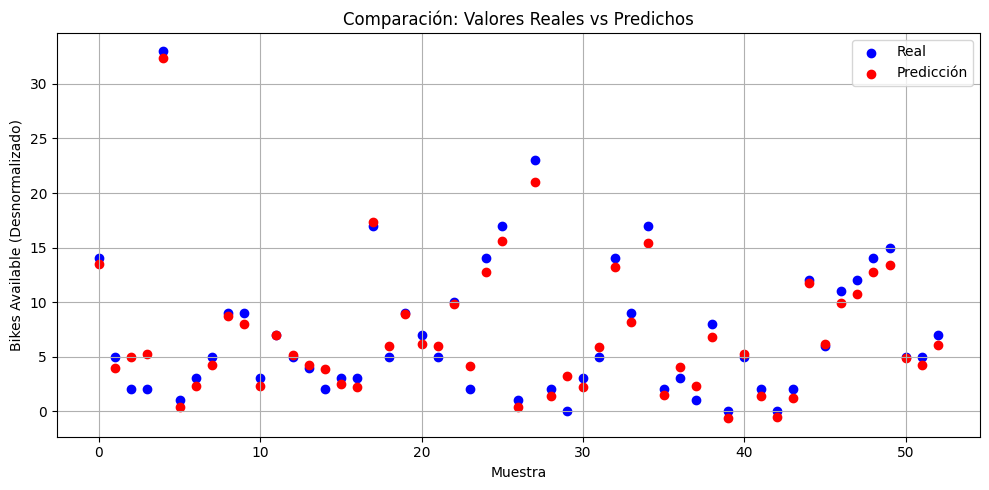

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test_real)), y_test_real, label='Real', color='blue')
plt.scatter(range(len(y_pred_real)), y_pred_real, label='Predicción', color='red')
plt.title('Comparación: Valores Reales vs Predichos')
plt.xlabel('Muestra')
plt.ylabel('Bikes Available (Desnormalizado)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


7.2 Grafico de residuos (Real - Prediccion)

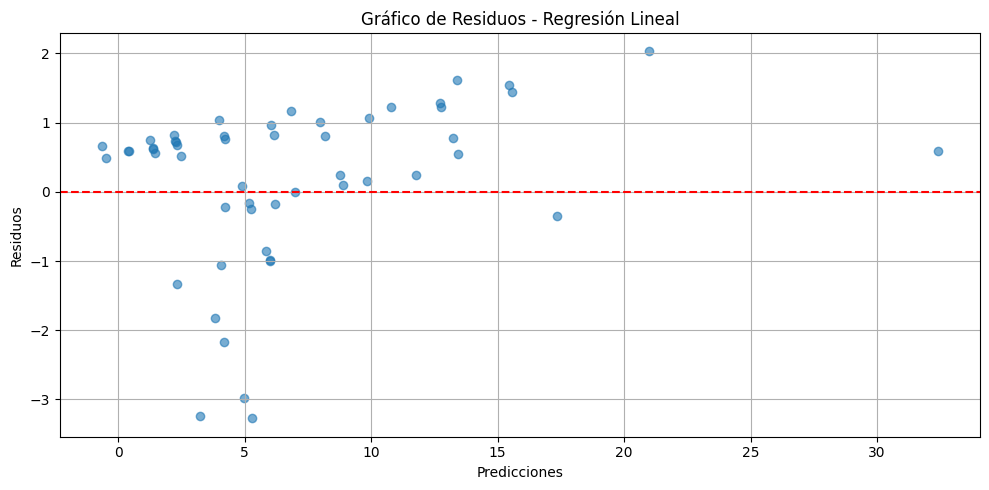

In [17]:
residuos = y_test_real - y_pred_real
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_real, residuos, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Residuos - Regresión Lineal')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.grid(True)
plt.tight_layout()
plt.show()

7.3 Coeficientes del modelo

In [18]:
coeficientes = modelo.coef_[0]
nombres_features = ['docksAvailable', 'totalDocks', 'latitude', 'longitude']

print("\n--- Coeficientes del modelo ---")
for nombre, coef in zip(nombres_features, coeficientes):
    print(f"{nombre}: {coef:.4f}")


--- Coeficientes del modelo ---
docksAvailable: -1.0371
totalDocks: 0.7812
latitude: -0.0196
longitude: -0.0015


Visualizamos cómo se comparan los valores reales vs los predichos por el modelo.

8. Prediccion para una nueva estacion

In [16]:
nueva_muestra = np.array([[10, 15, 39.9522, -75.1639]])
nueva_muestra_norm = scaler_X.transform(nueva_muestra)

prediccion_norm = modelo.predict(nueva_muestra_norm)
prediccion_final = scaler_y.inverse_transform(prediccion_norm)

print(f"\nPredicción para estación con 10 docks disponibles, 15 en total y coordenadas (lat, lon): {prediccion_final[0][0]:.2f} bicicletas disponibles")



Predicción para estación con 10 docks disponibles, 15 en total y coordenadas (lat, lon): 4.17 bicicletas disponibles


Realizamos una predicción para una estación hipotética y mostramos el resultado en escala original.